## About Dataset

### 📄 Description:
This dataset contains **sales transaction records** for an electronics company over a one-year period, spanning from **September 2023 to September 2024**.  
It includes detailed information about **customer demographics**, **product types**, and **purchase behaviors**.

---

### 🔑 Key Features:

- **Customer ID**: Unique identifier for each customer.  
- **Age**: Age of the customer *(numeric)*  
- **Gender**: Gender of the customer *(Male or Female)*  
- **Loyalty Member**: *(Yes/No)* – *Values change over time; pay attention to who cancelled and who signed up*  
- **Product Type**: Type of electronic product sold *(e.g., Smartphone, Laptop, Tablet)*  
- **SKU**: Unique code for each product.  
- **Rating**: Customer rating of the product *(1–5 stars)*  
  - *Note: There should be no null ratings.*  
- **Order Status**: Status of the order *(Completed, Cancelled)*  
- **Payment Method**: Method used for payment *(e.g., Cash, Credit Card, PayPal)*  
- **Total Price**: Total price of the transaction *(numeric)*  
- **Unit Price**: Price per unit of the product *(numeric)*  
- **Quantity**: Number of units purchased *(numeric)*  
- **Purchase Date**: Date of the purchase *(format: YYYY-MM-DD)*  
- **Shipping Type**: Type of shipping chosen *(e.g., Standard, Overnight, Express)*  
- **Add-ons Purchased**: List of any additional items purchased *(e.g., Accessories, Extended Warranty)*  
- **Add-on Total**: Total price of add-ons purchased *(numeric)*

> **Note:** The originally generated data had exactly **50%** counts for both **gender** and **loyalty** status.

---

### 📊 Data Stats:

- **Total Rows**: 20,000  
- **Time Period**: September 2023 – September 2024  
- **Product Types**: Includes various electronics such as  
  *Smartphones, Laptops, Tablets, and Smartwatches.*

---

### 🧰 Tools & Usage:

- **Pandas** – For data processing, grouping, aggregation, and calculating correlations.  
- **Matplotlib** – For visualizing analysis results and creating graphs (e.g., bar plots, pie charts).  
- **Seaborn** – For styling graphs and enhancing visual representations of relationships.  
- **Correlation Analysis** – To determine the statistical relationship between variables.

These tools were used to:
- Perform comprehensive data analysis  
- Identify the relationship between the number of items and the total cost  
- Visualize and interpret results effectively


In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Downloading of basic data
df = pd.read_csv('drive/MyDrive/Data Analysis 7.0/Electronic Sales Sep2023-Sep2024/Electronic_sales_Sep2023-Sep2024.csv')

## 0. Data Analysis Before Starting Work

### 📦 Data Size Overview

In [ ]:
# Checking data size
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

# Checking DataFrame memory
print(f'Data size in memory (in bytes): {df.memory_usage(deep=True).sum()}')

Number of rows: 20000
Number of columns: 16
Data size in memory (in bytes): 12826718


###📊 Dataset Overview

In [ ]:
pd.concat([df.head(3), df.tail(3)])

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34
19999,19998,27,NaN,Yes,Laptop,LTP123,4,Completed,Bank Transfer,674.32,674.32,1,2024-01-29,Expedited,NaN,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

###🔍 Checking for Missing Values in the Dataset

In [ ]:
df.isna().sum()

,0
Customer ID,0
Age,0
Gender,1
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


## Handling Missing Data in Gender and Add-on Purchased Columns

You can see that there is missing data in the **Gender** and **Add-on Purchased** columns.

### 📝 Reason for Leaving Add-on Purchased Unchanged:
The **Add-on Purchased** column contains a textual description of additional products purchased (or not) together with the main purchase. This column only reflects the fact of the action (whether an add-on was purchased), and deleting this data could significantly distort the dataset. Therefore, we will **leave it unchanged**.

### 🗑️ Deleting Row with Missing Data in Gender:
We will delete the row with **index 19999** where the **Gender** column has a missing value, as it is **not statistically significant** for the entire dataset.
And overwrite the modified dataset into a new variable.

In [ ]:
df_clean = df.dropna(subset=['Gender'])

### Checking the Changes Made

In [ ]:
df_clean.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


### Changing Data Types in Some Columns

Let's change the data type in some columns, for example, **Purchase Date** to `datetime64`.

In [ ]:
df_clean = df_clean.astype({'Purchase Date': 'datetime64[ns]'})

### Renaming Columns

Rename the **Total Price** column to **Total Amount**.

In [ ]:
df_clean = df_clean.rename(columns={'Total Price': 'Total Amount'})

### Let's check all changes made with the current dataframe.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        19999 non-null  int64         
 1   Age                19999 non-null  int64         
 2   Gender             19999 non-null  object        
 3   Loyalty Member     19999 non-null  object        
 4   Product Type       19999 non-null  object        
 5   SKU                19999 non-null  object        
 6   Rating             19999 non-null  int64         
 7   Order Status       19999 non-null  object        
 8   Payment Method     19999 non-null  object        
 9   Total Amount       19999 non-null  float64       
 10  Unit Price         19999 non-null  float64       
 11  Quantity           19999 non-null  int64         
 12  Purchase Date      19999 non-null  datetime64[ns]
 13  Shipping Type      19999 non-null  object        
 14  Add-ons Pur

### Let's consider the statistical indicators of the data.

In [ ]:
with pd.option_context('display.precision', 3):
    display(df_clean.describe())

,Customer ID,Age,Rating,Total Amount,Unit Price,Quantity,Purchase Date,Add-on Total
count,19999.000,19999.000,19999.000,19999.000,19999.000,19999.000,19999,19999.000
mean,10483.051,48.995,3.094,3180.259,578.627,5.486,2024-04-18 10:48:06.264313344,62.248
min,1000.000,18.000,1.000,20.750,20.750,1.000,2023-09-24 00:00:00,0.000
25%,5478.000,33.000,2.000,1139.680,361.180,3.000,2024-02-05 00:00:00,7.625
50%,9999.000,49.000,3.000,2534.490,463.960,5.000,2024-04-24 00:00:00,51.700
75%,15503.500,65.000,4.000,4639.600,791.190,8.000,2024-07-08 00:00:00,93.845
max,19997.000,80.000,5.000,11396.800,1139.680,10.000,2024-09-23 00:00:00,292.770
std,5631.471,18.039,1.224,2544.981,312.281,2.871,NaN,58.058


## Analysis of Total Amount

### Large Scatter in the Data:
The amounts range from a low of **20.75** to a high of **11396.80**, indicating significant variation in the data. Although the mean is around **3180**, the **standard deviation** (**2544.981**) shows that the data is highly scattered.

### Distribution of Amounts:
A large portion of the data is below **4639.60** (**75% of the values**), but there is also a significant proportion of values above the **median** of **2534.49**, confirming the presence of large amounts.

### Presence of Extreme Values:
There are extreme values in the dataset. Many records have amounts that are significantly lower or higher than the mean, which may indicate the presence of extreme values, such as large purchases or transactions.

### 1. Let's consider what are the demographic characteristics of our customers?  
How are customers distributed by age and gender? Are there any age groups that are more active in purchasing our products?

Distribution by gender:
Gender
Male      6197
Female    5938
Name: count, dtype: int64

Age distribution:
count    12135.000000
mean        49.125010
std         18.121164
min         18.000000
25%         33.000000
50%         49.000000
75%         65.000000
max         80.000000
Name: Age, dtype: float64


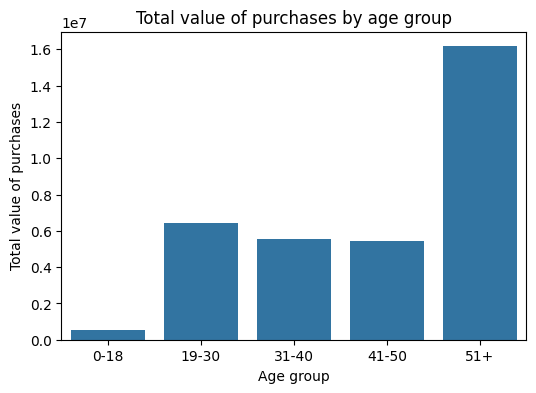

In [ ]:
# Distribution by gender
gender_distribution = df_clean.groupby('Customer ID')['Gender'].first().value_counts()
print("Distribution by gender:")
print(gender_distribution)

# Age distribution
age_distribution = df_clean.groupby('Customer ID')['Age'].first().describe()
print("\nAge distribution:")
print(age_distribution)

# Age groups that buy more
customer_ages = df_clean.groupby('Customer ID')['Age'].first().reset_index()['Age']
age_groups = pd.cut(customer_ages, bins=[0, 18, 30, 40, 50, 100], labels=['0-18', '19-30', '31-40', '41-50', '51+'])
df_clean['Age Group'] = age_groups
age_group_purchase = df_clean.groupby('Age Group')['Total Amount'].sum().reset_index()

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='Age Group', y='Total Amount', data=age_group_purchase)
plt.title('Total value of purchases by age group')
plt.xlabel('Age group')
plt.ylabel('Total value of purchases')
plt.show();

## Conclusion:

We have an almost equal distribution between **men** and **women** in the sample, with a slight predominance of men (with a difference of **259 people**). The sample has an **age distribution** that covers quite wide age ranges, with a predominance of middle-aged and older people.

The visualization shows that the largest amount of **electronic goods purchases** is brought in by the age group **over 51 years old**.

### 2. How does gender affect sales, is there any dependence?

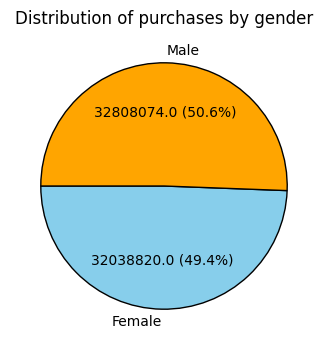

In [ ]:
# Calculate the total purchase amount for each customer
df_clean['Total Purchase'] = df_clean['Total Amount'] + df_clean['Add-on Total']

# Aggregate by gender
summary = df_clean.groupby('Gender')['Total Purchase'].sum().reset_index()

# Function for formatting a caption with an absolute value and percentage
def func(pct, allvals):
    absolute = round(pct / 100.*sum(allvals), 2)
    return f"{absolute} ({pct:.1f}%)"

#Visualisation
plt.figure(figsize=(6, 4))
plt.pie(summary['Total Purchase'], labels=summary['Gender'], autopct=lambda pct: func(pct, summary['Total Purchase']),
        colors=['skyblue', 'orange'], startangle=180, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of purchases by gender')
plt.show();

## Conclusion:
The calculations indicate, and the visualisation confirms, an even distribution of sales between the two groups by gender with a minimum difference of 0.6% in favour of men.

### 3. How does loyalty program status affect customer behavior?
What percentage of customers who are in a loyalty program make repeat purchases compared to those who are not in the program?

In [ ]:
# Transforming data to analyse repeat purchases
df_clean['Purchase Count'] = df.groupby('Customer ID')['Purchase Date'].transform('count')

# Analysis of repeat purchases for loyalty programme participants
loyal_customers = df_clean[df_clean['Loyalty Member'] == 'Yes']
non_loyal_customers = df_clean[df_clean['Loyalty Member'] == 'No']

# Percentage of customers with repeat purchases for loyal and disloyal customers
loyal_repeat_buyers = loyal_customers[loyal_customers['Purchase Count'] > 1].shape[0]
non_loyal_repeat_buyers = non_loyal_customers[non_loyal_customers['Purchase Count'] > 1].shape[0]

total_loyal_customers = loyal_customers.shape[0]
total_non_loyal_customers = non_loyal_customers.shape[0]

percent_loyal_repeat = (loyal_repeat_buyers / total_loyal_customers) * 100
percent_non_loyal_repeat = (non_loyal_repeat_buyers / total_non_loyal_customers) * 100

print(f"Percentage of customers who are members of the loyalty programme and have made repeat purchases: {percent_loyal_repeat:.2f}%")
print(f"Percentage of customers who are not members of the loyalty programme and made repeat purchases: {percent_non_loyal_repeat:.2f}%")

Percentage of customers who are members of the loyalty programme and have made repeat purchases: 69.00%
Percentage of customers who are not members of the loyalty programme and made repeat purchases: 66.21%


## Conclusion:

The ratio of the two categories of customers does not show a significant difference. It is assumed that the **loyalty programme** is not as attractive to customers. Therefore, it is necessary to consider additional **promotions** or **bonuses** to attract new customers to the programme.

### 4. What products are in greatest demand?
Which product categories (e.g. smartphones, laptops, tablets) have the highest sales?

In [ ]:
# Analysis of the most popular products by category (by number of sales)
df_clean['Total Orders'] = df_clean['Total Amount'] + df_clean['Add-on Total']
product_sales = df_clean.groupby('Product Type').agg(
    total_sales=('Quantity', 'sum'),
    total_ordered=('Total Orders', 'sum')
).reset_index()

# Sort by number of sales
product_sales_sorted_by_qty = product_sales.sort_values(by='total_sales', ascending=False)

high_demand_products = product_sales_sorted_by_qty[product_sales_sorted_by_qty['total_sales'] > 1]  # products that have been sold more than once
high_volume_products = product_sales_sorted_by_qty[product_sales_sorted_by_qty['total_ordered'] > 1000]  # products with an income of more than 1000

print("\nProducts with the highest demand (by number of sales):")
print(high_demand_products)

print("\nProducts with the highest order volume:")
print(high_volume_products)


Products with the highest demand (by number of sales):
  Product Type  total_sales  total_ordered
2   Smartphone        32660    21847780.24
4       Tablet        22653    11968240.83
3   Smartwatch        21631    14277696.42
1       Laptop        21583    12545590.96
0   Headphones        11183     4207582.56

Products with the highest order volume:
  Product Type  total_sales  total_ordered
2   Smartphone        32660    21847780.24
4       Tablet        22653    11968240.83
3   Smartwatch        21631    14277696.42
1       Laptop        21583    12545590.96
0   Headphones        11183     4207582.56


## Conclusions:

- **Smartphones** are the product with the highest demand and highest order volume.
- **Tablets** and **laptops** are close to each other in terms of units sold, but tablets generate fewer orders volume, which may be due to their lower cost compared to laptops.
- **Smartwatches** – although they don't generate many orders, their high price makes them a commodity with good sales.
- **Headphones** sell in much smaller quantities and bring in fewer sales.

## Recommendations:

- For **smartphones** and **laptops**, it is enough to focus on maintaining current demand and existing marketing strategies.
- For **tablets** and **headphones**, consider how to increase their price, perhaps by adding additional features to increase overall sales.
- **Smart watches** can be promoted through promotions or additional accessories to stimulate demand and improve financial results.

### 5. What is the correlation between price and product rating?
What does this mean for the price of a product and its rating?

In [ ]:
# Calculating the correlation between price and rating
correlation = df_clean['Unit Price'].corr(df_clean['Rating'])
print(f"Correlation between price and rating: {correlation:.2f}")

Correlation between price and rating: -0.34


The correlation between **price** and **rating** of **-0.34** indicates a weak negative relationship between these two variables. This means that as the price increases, there may be a slight decrease in the rating, but this relationship is not strong or direct. A negative correlation could also mean that customers may give lower ratings to more expensive products for some reason (e.g., because of expectations that were not met).

## Recommendations:
If such high-priced but low-rated products are identified, improvements in quality or marketing communications can be considered to increase customer satisfaction and, as a result, ratings.

### 6. What payment method do customers prefer? Which payment method (Cash, Credit Card, PayPal, Bank Transfer, Debit Card) is used most often?

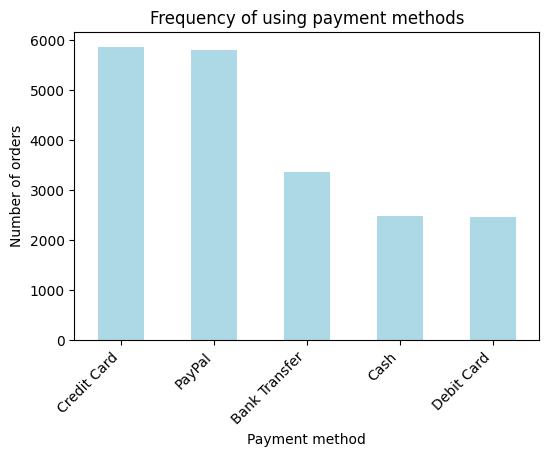

In [ ]:
# Let's bring all values to the same form by replacing “Paypal” with 'PayPal'
df_clean['Payment Method'] = df_clean['Payment Method'].replace({'Paypal': 'PayPal'})

# Let's find out which payment method is used most often
payment_method_counts = df_clean['Payment Method'].value_counts()

#Visualisation
plt.figure(figsize=(6, 4))
payment_method_counts.plot(kind='bar', color='lightblue')
plt.title('Frequency of using payment methods')
plt.xlabel('Payment method')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha='right')
plt.show();

## Conclusions:

- **Credit Card** and **PayPal** are the most popular payment methods, indicating that these methods are convenient and preferred by customers.
- **Bank Transfer**, **Cash**, and **Debit Card** are less popular payment methods, which may be due to limitations such as the need for available funds or the complexity of bank transfers.
- In the case of **Cash** and **Debit Card**, ways to improve their usability or accessibility to users could also be considered.
- **Bank Transfer** is less popular, but it is popular enough to compete with established payment methods such as **Credit Card** and **PayPal**, making it a more stable method for completing transactions, although not always preferred by users.

### 7. Let's look at the dynamics of total orders by month and by product type.
Does the index of orders have a positive trend? Let's create a pivot table and build line graphs on its basis.


In [ ]:
# Add columns for month and quarter
df_clean['Month'] = df_clean['Purchase Date'].dt.month
df_clean['Quarter'] = df_clean['Purchase Date'].dt.to_period('Q')
total_amount_pivot = df_clean.pivot_table(index = 'Month', columns = 'Product Type', values = 'Total Amount', aggfunc = 'sum')
total_amount_pivot

Product Type,Headphones,Laptop,Smartphone,Smartwatch,Tablet
Month,,,,,
1,527683.98,1312954.60,2292431.70,1232924.57,1253503.30
2,411384.02,1218575.52,1714157.72,1180159.78,1209419.02
3,467366.92,1226779.56,2223706.32,1175846.98,1230668.06
4,466440.60,1304756.40,2107090.47,1373303.75,1166662.40
5,463032.76,1329515.76,2174788.36,1535246.93,1206459.12
6,466644.56,1287399.40,2325146.24,1341316.05,1248127.34
7,435221.90,1271624.76,2039859.00,1410049.27,1378374.59
8,474590.52,1179968.68,2376801.30,1401186.68,1273571.43
9,329034.98,949795.32,2018647.51,1191370.71,1030804.39


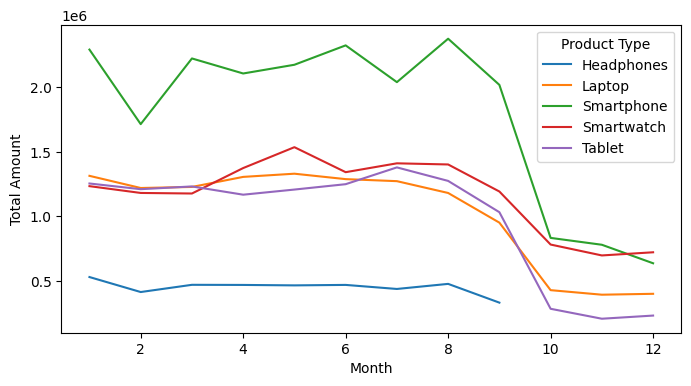

In [ ]:
total_amount_pivot.plot(kind='line', figsize=(8, 4))
plt.ylabel('Total Amount')
plt.tight_layout
plt.show();

## Conclusions:

### Seasonal Fluctuations:
- The highest order volumes are observed at the **beginning of the year**, which may indicate seasonality, such as high demand during the **holidays** or before the **summer season**.
- The absence of data for months **10-12** for **headphones** does not show a complete picture of orders, and this is likely due to generally low order volumes in the previous months, or no orders were taken in this category at all in months **10-12**.

### General Trends:
- There is a clear trend towards a **drop in orders** in the last months of the year (especially for **smartphones**, **laptops**, **tablets**, and **smartwatches**). This may be due to various factors, such as a decline in demand, expectations of new models entering the market, or **economic changes**.
- This is a very atypical picture of the market at this time of year in general (for **Europe** or **North America**, the picture would look diametrically opposite). The availability of data on the **region of orders** of these products could explain the downward trend towards the end of the year.

### Headphones:
- **Least prone** to declines in orders, despite the general trends. This may be due to the widespread use of **headphones**, both in everyday life and in work processes.

### Smartphones:
- This is the **best-selling** category, but with a clear decline in the **second half of the year**. This may be the result of new models with more attractive features.


### 8. What role does the type of delivery play in a customer's purchasing decision?
What type of delivery is best for our customers? How does this affect product selection and sales?

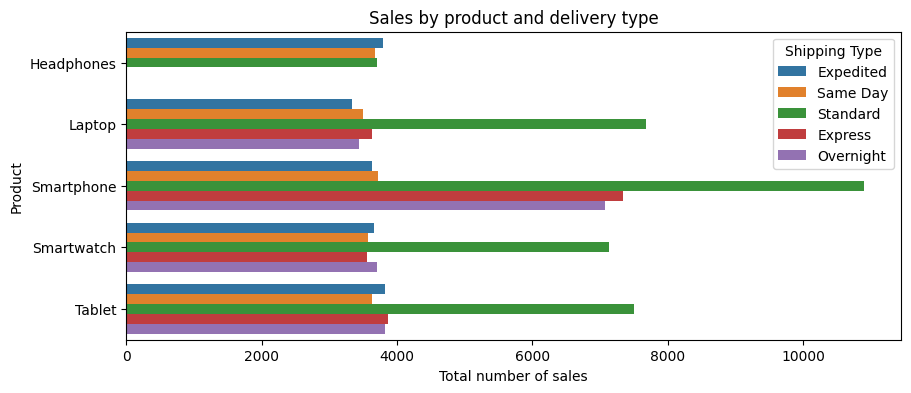

In [ ]:
# How the type of delivery affects the choice of products (number of sales by product and type of delivery)
product_shipping_sales = df_clean.groupby(['Product Type', 'Shipping Type']).agg(
    total_sales=('Quantity', 'sum'),
    total_revenue=('Total Amount', 'sum')
).reset_index()

#Visualisation
plt.figure(figsize=(10, 4))
sns.barplot(x='total_sales', y='Product Type', hue='Shipping Type', data=product_shipping_sales)
plt.title('Sales by product and delivery type')
plt.xlabel('Total number of sales')
plt.ylabel('Product')
plt.show();

## Conclusion:

Such expensive products as: **Smartphone**, **Laptop**, **Tablet**, and **Smartwatch**, are most often ordered using **Standard delivery**. The second and third most popular services are **Express** and **Overnight**.

This is due to the fact that the **Standard service** is the optimal ratio in terms of **price/delivery time**, which makes it more popular and, accordingly, allows it to significantly outperform other types of delivery.

### 9. How often customers purchase additional products (accessories, extended warranties)?

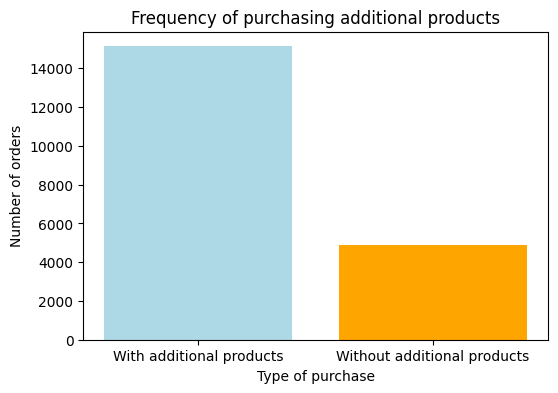


Frequency of purchases of additional products: 75.66%


In [ ]:
# Check how many orders contain additional products
add_ons_purchased_count = df_clean['Add-ons Purchased'].notnull().sum()

# Calculate the percentage of purchases of additional products
total_orders = len(df_clean)
no_add_ons_count = total_orders - add_ons_purchased_count
add_ons_percentage = (add_ons_purchased_count / total_orders) * 100

#Visualisation
labels = ['With additional products', 'Without additional products']
values = [add_ons_purchased_count, no_add_ons_count]
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['lightblue', 'orange'])
plt.title('Frequency of purchasing additional products')
plt.xlabel('Type of purchase')
plt.ylabel('Number of orders')
plt.show();

print(f"\nFrequency of purchases of additional products: {add_ons_percentage:.2f}%")

## Conclusion:

The graph shows that the frequency of purchasing additional goods (accessories, extended warranties, etc.) is significantly higher than the frequency of purchasing goods without additional options. The percentage was nearly **76%** of orders with complementary products versus nearly **24%** of orders without. This suggests that most customers prefer to add value to their purchases, which may be due to marketing strategies such as offering **discounts** on accessories or extended warranties, as well as a desire to increase the **functionality** or **protection** of their main products.

## How to Stimulate the Purchase of Additional Products?

- **Promotions and discounts**: Offer discounts on additional products with the purchase of the main product, such as a discount on accessories with the purchase of a smartphone or laptop.
  
- **Package deals**: Develop bundle offers, such as "bag and case for free with the purchase of a laptop", to increase the frequency of purchases of additional products.
  
- **Promotions and reminders**: Use **e-mail marketing** or **push notifications** to remind customers of additional products that can be useful when using the main product (e.g., accessories, extended warranty).

These approaches can help increase conversions and encourage customers to purchase additional products.

### 10. What is the average bill for each type of product?  
What is the average purchase price for different types of products?  
How can the average bill be increased?

In [ ]:
# Calculate the average purchase price (average bill)
average_bill_by_product_type = df_clean.groupby('Product Type')['Total Amount'].mean()
print("Average bill by product type:")
print(average_bill_by_product_type)

# Analyse ways to increase the average bill by offering discounts when purchasing multiple units
df_clean['discounted_total_price'] = df_clean.apply(lambda row: row['Total Amount'] * 0.9 if row['Quantity'] > 2 else row['Total Amount'], axis=1)

# Recalculating the average bill taking into account the discount
average_discounted_bill = df_clean.groupby('Product Type')['discounted_total_price'].mean()
print("\nAverage bill including discount offers:")
print(average_discounted_bill)

Average bill by product type:
Product Type
Headphones    2009.647061
Laptop        3095.560335
Smartphone    3599.323300
Smartwatch    3567.939263
Tablet        2853.801269
Name: Total Amount, dtype: float64

Average bill including discount offers:
Product Type
Headphones    1818.901720
Laptop        2803.137782
Smartphone    3258.373631
Smartwatch    3231.076186
Tablet        2583.904819
Name: discounted_total_price, dtype: float64


## Conclusions

### Ways to Increase the Average Bill

- **Combined Offers (Product Packages):**  
  Offer customers discounts or additional products when they purchase multiple items.  
  *Example:* Provide bundles where a customer receives a discount on accessories or extended warranties when purchasing a smartphone and tablet together.

- **Discounts for Bulk Purchases:**  
  For products that are often bought in larger quantities, offer a discount when the customer purchases more than a set number (e.g., more than 2 units of the same item).

- **Personalised Offers:**  
  Use data from customers' previous purchases to create tailored deals.  
  *Example:* Recommend complementary products or offer discounts on items related to their past orders.

- **Promotions:**  
  Run limited-time promotions that give customers discounts or bonuses for purchasing from specific categories.  
  This can encourage them to choose higher-value items.

- **Additional Products:**  
  Recommend relevant add-ons such as accessories, extended warranties, or insurance options at checkout to increase the total order value.

### 11. What factors influence order cancellations?  
Are there any patterns in the order cancellation data?  
For example, do customers who choose certain delivery methods or payment methods cancel their orders?

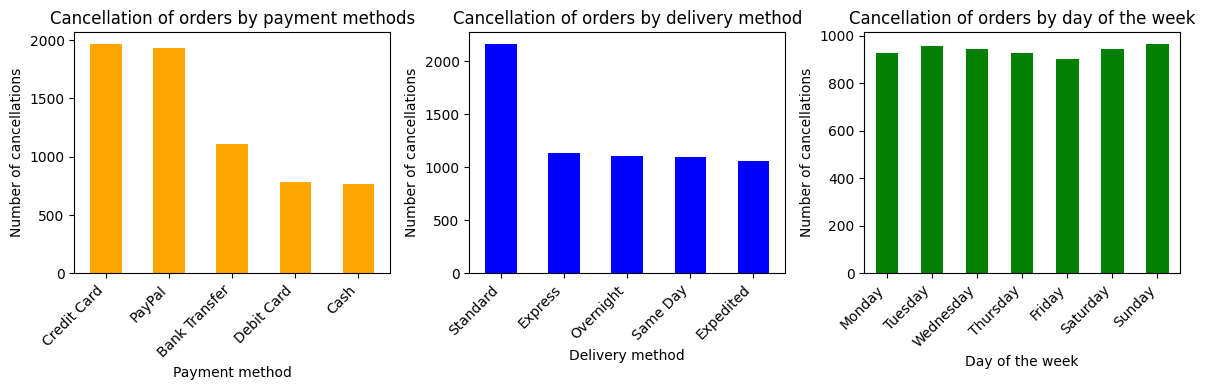

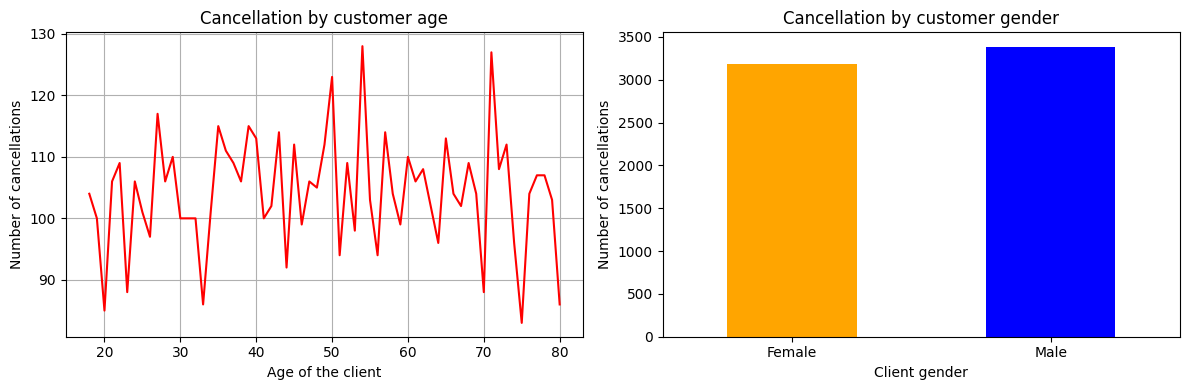

In [ ]:
# 1. Analysis of cancellations by payment method
payment_cancellations = df_clean[df_clean['Order Status'] == 'Cancelled'].groupby('Payment Method').size().sort_values(ascending=False)
# 2. Analysis of cancellations by delivery method
shipping_cancellations = df_clean[df_clean['Order Status'] == 'Cancelled'].groupby('Shipping Type').size().sort_values(ascending=False)
# 3. Analysis by day of the week
df_clean['Day of Week'] = df_clean['Purchase Date'].dt.dayofweek  # День тижня (0 – понеділок, 6 – неділя)
day_of_week_cancellations = df_clean[df_clean['Order Status'] == 'Cancelled'].groupby('Day of Week').size()
# 4. Analysis of cancellations by customer age and gender
age_cancellations = df_clean[df_clean['Order Status'] == 'Cancelled'].groupby('Age').size()
gender_cancellations = df_clean[df_clean['Order Status'] == 'Cancelled'].groupby('Gender').size()

# Visualizations
# Cancellation by payment method
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
payment_cancellations.plot(kind='bar', color='orange')
plt.title('Cancellation of orders by payment methods')
plt.xlabel('Payment method')
plt.ylabel('Number of cancellations')
plt.xticks(rotation=45, ha='right')

# Cancellation by delivery method
plt.subplot(1, 3, 2)
shipping_cancellations.plot(kind='bar', color='blue')
plt.title('Cancellation of orders by delivery method')
plt.xlabel('Delivery method')
plt.ylabel('Number of cancellations')
plt.xticks(rotation=45, ha='right')

# Cancellations by day of the week
plt.subplot(1, 3, 3)
day_of_week_cancellations.plot(kind='bar', color='green')
plt.title('Cancellation of orders by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of cancellations')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, ha='right')
plt.tight_layout()

# Cancellation by customer age
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
age_cancellations.plot(kind='line', color='red')
plt.title('Cancellation by customer age')
plt.xlabel('Age of the client')
plt.ylabel('Number of cancellations')
plt.grid(True)

# Cancellation by customer gender
plt.subplot(1, 2, 2)
gender_cancellations.plot(kind='bar', color=['orange', 'blue'])
plt.title('Cancellation by customer gender')
plt.xlabel('Client gender')
plt.ylabel('Number of cancellations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show();

## Conclusions

### Order Cancellations by Payment Method

**Observations:**
- **Credit Card** and **PayPal**, being the most popular online payment methods, show the highest number of cancellations. This may be due to **impulse purchases**, where customers place an order quickly and then change their minds.
- **Bank Transfer**, **Debit Card**, and **Cash** are associated with more deliberate purchasing decisions, potentially explaining the lower cancellation rates.

**Possible Reasons:**
- Problems with credit card or PayPal authorisation.
- Lack of funds in the account.
- Customer changes their mind after placing an order.
- Fraudulent activity.

**Recommendations:**
- Optimise the online payment process to reduce errors and simplify authorisation.
- Offer multiple payment options to meet customer preferences.
- Implement a fraud detection system.

---

### Order Cancellations by Delivery Method

**Observations:**
- **Standard delivery** often has the longest lead times, which can lead to cancellations as customers change their minds during the wait.
- **Express**, **Overnight**, **Same Day**, and **Expedited** options reduce wait times, helping to lower the risk of cancellations.

**Possible Reasons:**
- Mismatch between declared and actual delivery time.
- Damage to goods during transport.
- Change in customer plans.

**Recommendations:**
- Improve logistics and reduce delivery times.
- Ensure high-quality packaging to prevent damage.
- Provide real-time order tracking for customers.

---

### Order Cancellations by Day of the Week

**Observations:**
- Cancellations are **evenly distributed** across the week, suggesting no strong correlation with specific days.
- A slight drop in cancellations on **Sundays** may be related to lower online shopping activity.

**Possible Reasons:**
- Cancellations are influenced by other factors beyond the day of the week.

**Recommendations:**
- Continue monitoring to detect potential future patterns.

---

### Cancellations by Customer Age

**Observations:**
- High volatility in cancellations by age group suggests **age is not a key factor**.
- The data reflects raw numbers; it does not account for the number of orders placed by each age group.

**Possible Reasons:**
- Different age groups exhibit varying preferences and shopping behavior.

**Recommendations:**
- Perform a more detailed analysis considering purchasing behavior across age groups.

---

### Order Cancellations by Customer Gender

**Observations:**
- Slightly more cancellations are observed among **male** customers.

**Possible Reasons:**
- Potential differences in purchasing behavior between men and women.

**Recommendations:**
- Conduct deeper analysis of gender-based shopping habits.

---

### General Recommendations

- Consider order cancellations as a **multi-factor issue** that requires a comprehensive approach.
- **Implement a customer feedback system** to better understand cancellation reasons and improve service quality.


### 12. What is the relationship between the number of items in an order and the total cost?

In [ ]:
correlation = df_clean['Quantity'].corr(df_clean['Total Amount'])
print(f'Correlation between the number of items and the total value: {correlation}')


Correlation between the number of items and the total value: 0.6538507867595218


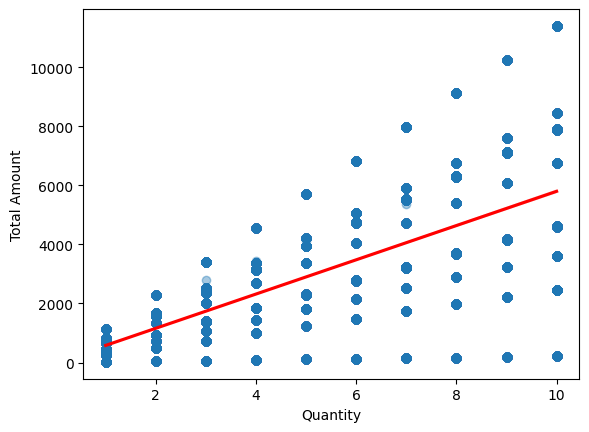

In [ ]:
sns.regplot(data = df_clean, x = 'Quantity', y = 'Total Amount', scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'red'});

## Conclusions

The correlation of **0.65** between the number of items and the total value indicates a **moderately positive relationship** between these two variables. This means that there is a noticeable trend: as the number of items in an order increases, its total value also increases, but this relationship is not perfect.

This is also evident in the visualisation, where the **red line** represents the predicted relationship between the number of items and the total cost, determined by the **linear regression model**. The upwardly sloping line confirms the previously calculated **positive linear correlation** between the number of items and the total value.

However, the **scatter of data points** suggests that other factors (e.g. **product price differences**, **discounts**, **packaging**, and other **additional costs**) may also influence the total cost, as the linear model does not perfectly predict the cost for all data points.

## Key Recommendations

- **Loyalty program**  
  It is necessary to consider additional promotions, cooperation with other companies, bonuses and discounts for users participating in the loyalty program.

- **Orders Volume**  
  It is necessary to take into account seasonal fluctuations in sales. Since the dataset does not contain information on sales regions, which is a disadvantage in the analysis. The sales region would allow us to adjust the assessment of user behavior relative to location and cultural differences.

- **Order Cancellation**  
  It is necessary to take into account that order cancellations can be caused by various factors, accordingly, it is worth considering them in a complex. Implementation of a customer feedback system will help to identify the reasons for cancellations and improve the quality of service.

During the analysis, a **modified dataset** was created. It is necessary to overwrite it into a **CSV** format with a different name for further visualisation.

In [ ]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 5)
df_clean.head(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Amount,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Group,Total Purchase,Purchase Count,Total Orders,Month,Quarter,discounted_total_price,Day of Week
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,51+,5578.54,2,5578.54,3,2024Q1,4984.497,2
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,41-50,767.18,2,767.18,4,2024Q2,666.981,5
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,51+,1855.84,2,1855.84,10,2023Q4,1670.256,1
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,41-50,3224.92,2,3224.92,8,2024Q3,2848.284,4
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,19-30,77.06,1,77.06,5,2024Q2,41.500,1


In [ ]:
df_clean.to_csv('drive/MyDrive/Data Analysis 7.0/Electronic Sales Sep2023-Sep2024/Electronic_sales_Sep2023-Sep2024_Changed.csv', index = False)